# Mental Health in Tech Survey
Dataset obtained from [Kaggle](https://www.kaggle.com/osmi/mental-health-in-tech-survey), which was originally sourced from [OSMI](https://osmihelp.org/research/).

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = 100

In [2]:
# Load the dataset
mh_survey = pd.read_csv("survey.csv")
print("Rows: {}\nColumns: {}".format(mh_survey.shape[0], mh_survey.shape[1]))
mh_survey.head()

Rows: 1259
Columns: 27


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## Exploratory analysis and data cleaning
### Demographic survey questions
#### Age

In [3]:
mh_survey["Age"].describe().apply(lambda x: format(x, "f"))

count           1259.000000
mean        79428148.311358
std       2818299442.981952
min            -1726.000000
25%               27.000000
50%               31.000000
75%               36.000000
max      99999999999.000000
Name: Age, dtype: object

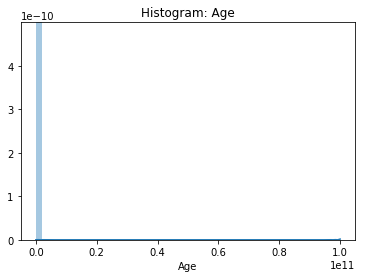

In [4]:
sns.distplot(mh_survey["Age"])
plt.title("Histogram: Age")
plt.show()

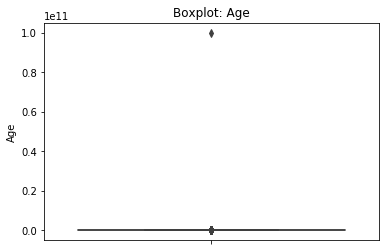

In [5]:
sns.boxplot(y="Age", data=mh_survey)
plt.title("Boxplot: Age")
plt.show()

In [6]:
# Quick check on values for age
# to see how many values fall outside the normal working ages (18-67)
for age in mh_survey["Age"]:
    if (age > 67) | (age < 18):
        print(age)

-29
329
99999999999
-1726
5
8
11
-1
72


In [7]:
# The reported age of 72 falls outside the intial range but is plausable
# We replace the remaining values with None and impute with the mean
def age_cleaner(age):
    if (age > 72) | (age < 18):
        return None
    else:
        return age

mh_survey["Age"] = mh_survey["Age"].apply(lambda x: age_cleaner(x))
mh_survey["Age"].fillna(mh_survey["Age"].mean(), inplace=True)
mh_survey["Age"].describe()

count    1259.000000
mean       32.076739
std         7.265061
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

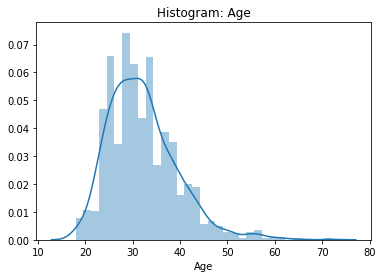

In [8]:
sns.distplot(mh_survey["Age"])
plt.title("Histogram: Age")
plt.show()

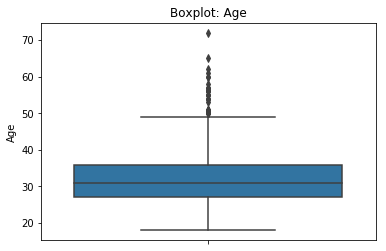

In [9]:
sns.boxplot(y="Age", data=mh_survey)
plt.title("Boxplot: Age")
plt.show()

#### Gender

In [10]:
# Gender
mh_survey["Gender"].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Cis Male                                            2
Man                                                 2
Female                                              2
Female (trans)                                      2
Cis Female                                          1
cis-female/femme                                    1
Mal                                                 1
Agender                     

In [11]:
# Helper function for cleaning the gender variable
def gender_sieve(gender):
    if (gender == "male") | (gender == "female"):
        return gender
    elif (gender == "m") | (gender == "man"):
        return "male"
    elif (gender == "f") | (gender == "woman"):
        return"female"
    else:
        return None

# Remove whitespace and convert to lower case
mh_survey["Gender"] = mh_survey["Gender"].apply(lambda x: x.strip().lower())

# Apply gender_sieve
mh_survey["Gender"] = mh_survey["Gender"].apply(lambda x: gender_sieve(x))

mh_survey["Gender"].value_counts()

male      976
female    242
Name: Gender, dtype: int64

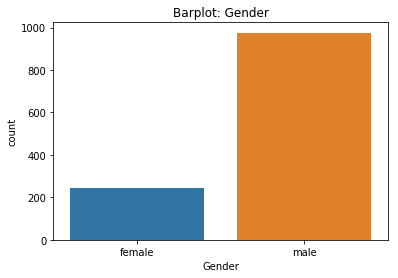

In [12]:
sns.countplot(mh_survey["Gender"])
plt.title("Barplot: Gender")
plt.show()

#### What country do you live in?

In [13]:
# Country
mh_survey["Country"].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Switzerland                 7
Italy                       7
Poland                      7
Sweden                      7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Bulgaria                    4
Singapore                   4
Finland                     3
Mexico                      3
Austria                     3
Russia                      3
Denmark                     2
Colombia                    2
Portugal                    2
Croatia                     2
Greece                      2
Bahamas, The                1
Thailand                    1
Slovenia                    1
Georgia                     1
Moldova   

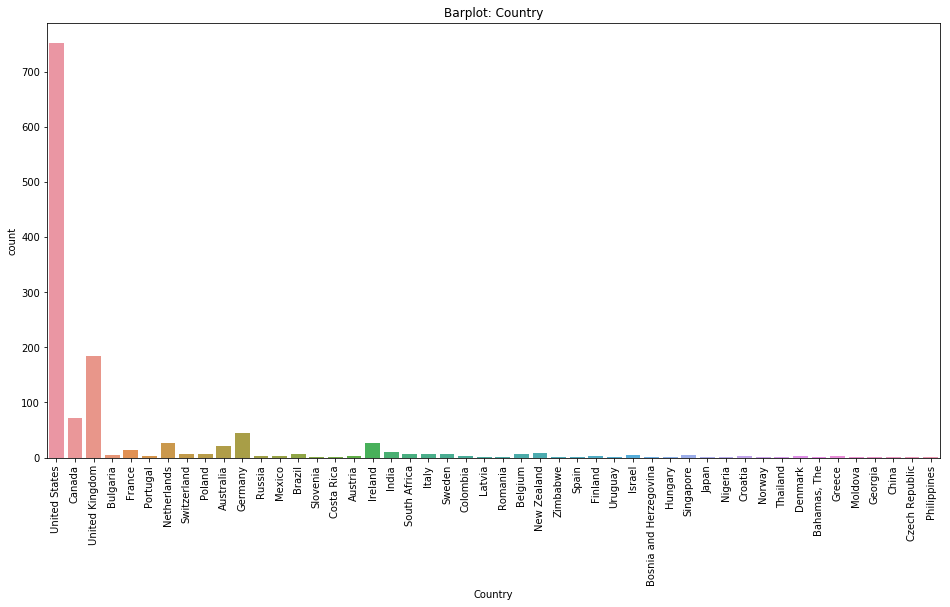

In [14]:
fig = plt.figure(figsize=(16, 8))
sns.countplot(mh_survey["Country"])
plt.title("Barplot: Country")
plt.xticks(rotation=90)
plt.show()

#### If you live in the United States, which state or territory do you live in?

In [15]:
# State
mh_survey["state"].value_counts()

CA    138
WA     70
NY     57
TN     45
TX     44
OH     30
IL     29
PA     29
OR     29
IN     27
MI     22
MN     21
MA     20
FL     15
VA     14
NC     14
MO     12
WI     12
GA     12
UT     11
CO      9
MD      8
AL      8
AZ      7
NJ      6
OK      6
SC      5
KY      5
DC      4
CT      4
IA      4
NV      3
NH      3
KS      3
SD      3
VT      3
WY      2
NE      2
NM      2
MS      1
ME      1
LA      1
WV      1
ID      1
RI      1
Name: state, dtype: int64

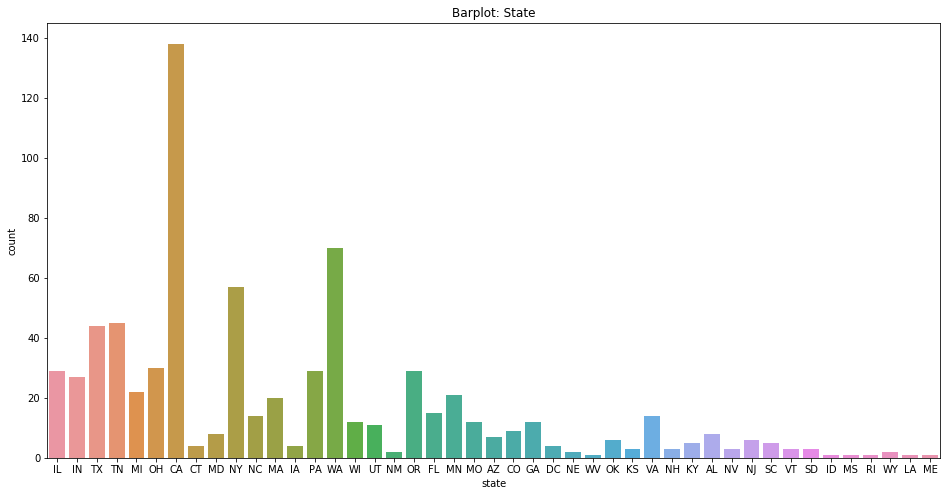

In [16]:
fig = plt.figure(figsize=(16, 8))
sns.countplot(mh_survey["state"])
plt.title("Barplot: State")
plt.show()

#### Are you self-employed?

In [17]:
# Self employed
mh_survey["self_employed"].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

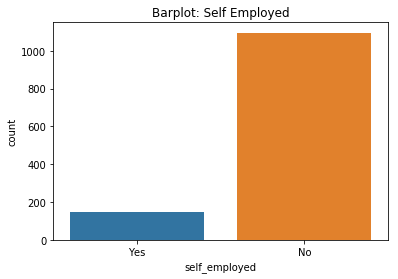

In [18]:
sns.countplot(mh_survey["self_employed"])
plt.title("Barplot: Self Employed")
plt.show()

#### How many employees does your company or organization have?

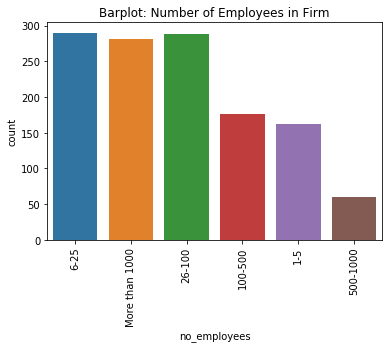

In [19]:
sns.countplot(mh_survey["no_employees"])
plt.title("Barplot: Number of Employees in Firm")
plt.xticks(rotation=90)
plt.show()

#### Is your employeer primarily a tech company/organization?

In [20]:
# Tech company
mh_survey["tech_company"].value_counts()

Yes    1031
No      228
Name: tech_company, dtype: int64

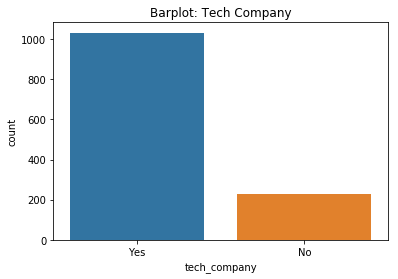

In [21]:
sns.countplot(mh_survey["tech_company"])
plt.title("Barplot: Tech Company")
plt.show()

#### Do you work remotely (outside of an office) at least 50% of the time?

In [22]:
# Remote work
mh_survey["remote_work"].value_counts()

No     883
Yes    376
Name: remote_work, dtype: int64

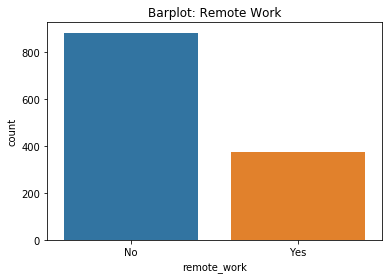

In [23]:
sns.countplot(mh_survey["remote_work"])
plt.title("Barplot: Remote Work")
plt.show()

### Mental health survey questions
#### Do you have a family history of mental illness?

In [24]:
# Family history
mh_survey["family_history"].value_counts()

No     767
Yes    492
Name: family_history, dtype: int64

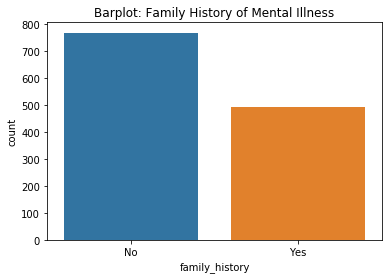

In [25]:
sns.countplot(mh_survey["family_history"])
plt.title("Barplot: Family History of Mental Illness")
plt.show()

#### Have you sought treatment for a mental health condition?

In [26]:
# Treatment
mh_survey["treatment"].value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

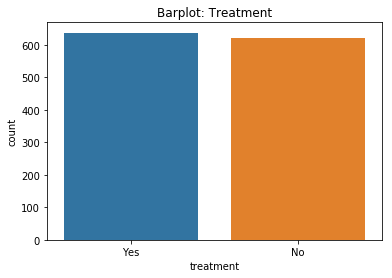

In [27]:
sns.countplot(mh_survey["treatment"])
plt.title("Barplot: Treatment")
plt.show()

#### If you have a mental health condition, do you feel that it interferes with your work?

In [28]:
# Work interfere
mh_survey["work_interfere"].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

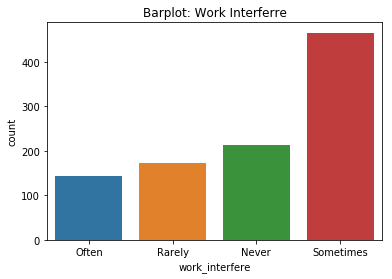

In [29]:
sns.countplot(mh_survey["work_interfere"])
plt.title("Barplot: Work Interferre")
plt.show()

#### Does your employer provide mental health benefits?

In [30]:
# Mental health benefits
mh_survey["benefits"].value_counts()

Yes           477
Don't know    408
No            374
Name: benefits, dtype: int64

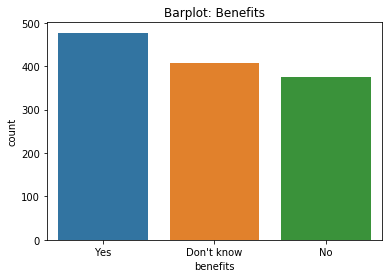

In [31]:
sns.countplot(mh_survey["benefits"])
plt.title("Barplot: Benefits")
plt.show()

#### Do you know the options for mental health care your employer provides?

In [32]:
# Care options
mh_survey["care_options"].value_counts()

No          501
Yes         444
Not sure    314
Name: care_options, dtype: int64

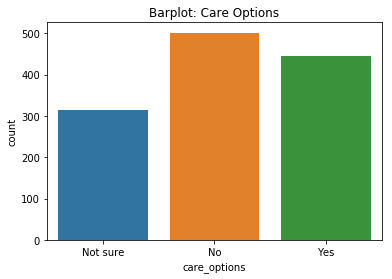

In [33]:
sns.countplot(mh_survey["care_options"])
plt.title("Barplot: Care Options")
plt.show()

#### Has your employer ever discussed mental health as part of an employee wellness program?

In [34]:
# Wellness program
mh_survey["wellness_program"].value_counts()

No            842
Yes           229
Don't know    188
Name: wellness_program, dtype: int64

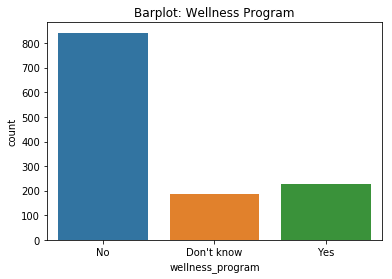

In [35]:
sns.countplot(mh_survey["wellness_program"])
plt.title("Barplot: Wellness Program")
plt.show()

#### Does your employer provide resources to learn more about mental health issues and how to seek help?

In [36]:
# Seek help
mh_survey["seek_help"].value_counts()

No            646
Don't know    363
Yes           250
Name: seek_help, dtype: int64

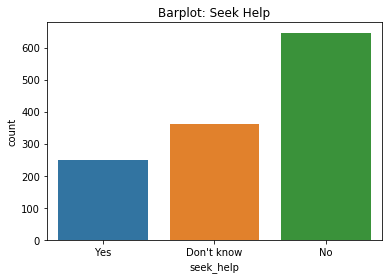

In [37]:
sns.countplot(mh_survey["seek_help"])
plt.title("Barplot: Seek Help")
plt.show()

#### Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

In [38]:
# Anonymity
mh_survey["anonymity"].value_counts()

Don't know    819
Yes           375
No             65
Name: anonymity, dtype: int64

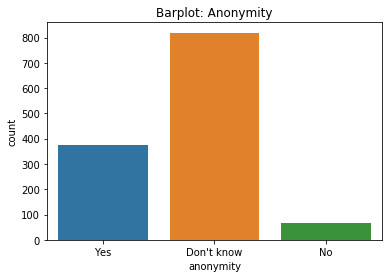

In [39]:
sns.countplot(mh_survey["anonymity"])
plt.title("Barplot: Anonymity")
plt.show()

#### How easy is it for you to take medical leave for a mental health condition?

In [40]:
# Leave
mh_survey["leave"].value_counts()

Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64

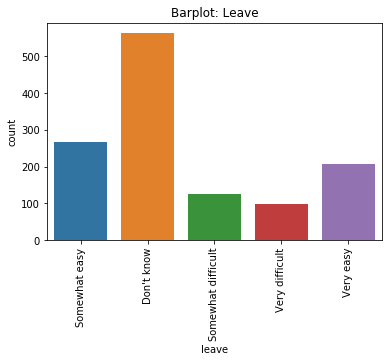

In [41]:
sns.countplot(mh_survey["leave"])
plt.title("Barplot: Leave")
plt.xticks(rotation=90)
plt.show()

#### Do you think that discussing a mental health issue with your employer would have negative consequences?

In [42]:
# Mental health consequence
mh_survey["mental_health_consequence"].value_counts()

No       490
Maybe    477
Yes      292
Name: mental_health_consequence, dtype: int64

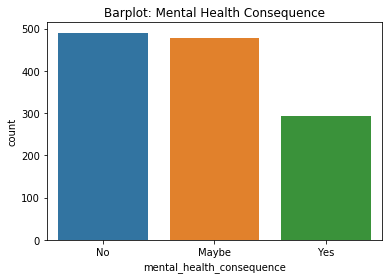

In [43]:
sns.countplot(mh_survey["mental_health_consequence"])
plt.title("Barplot: Mental Health Consequence")
plt.show()

#### Do you think that discussing a physical health issue with your employer would have negative consequences?

In [44]:
# Physical health consquences
mh_survey["phys_health_consequence"].value_counts()

No       925
Maybe    273
Yes       61
Name: phys_health_consequence, dtype: int64

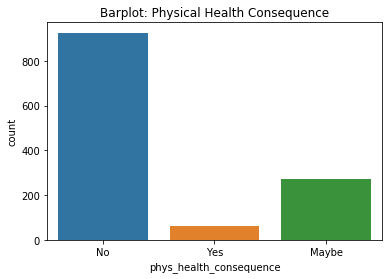

In [45]:
sns.countplot(mh_survey["phys_health_consequence"])
plt.title("Barplot: Physical Health Consequence")
plt.show()

#### Would you be willing to discuss a mental health issue with your coworkers?

In [46]:
# Coworkser
mh_survey["coworkers"].value_counts()

Some of them    774
No              260
Yes             225
Name: coworkers, dtype: int64

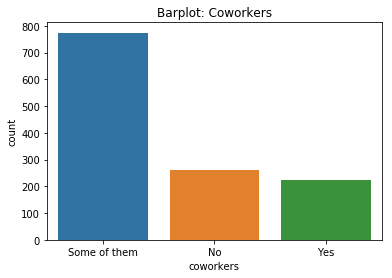

In [47]:
sns.countplot(mh_survey["coworkers"])
plt.title("Barplot: Coworkers")
plt.show()

#### Would you be willing to discuss a mental health issue with your direct supervisor(s)?

In [48]:
# Supervisor
mh_survey["supervisor"].value_counts()

Yes             516
No              393
Some of them    350
Name: supervisor, dtype: int64

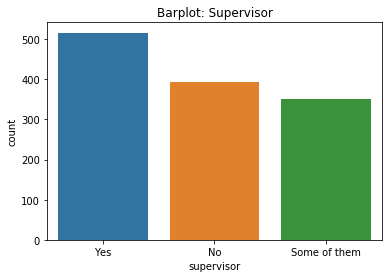

In [49]:
sns.countplot(mh_survey["supervisor"])
plt.title("Barplot: Supervisor")
plt.show()

#### Would you bring up a mental health issue with a potential employer in an interview?

In [50]:
# Mental health interview
mh_survey["mental_health_interview"].value_counts()

No       1008
Maybe     207
Yes        44
Name: mental_health_interview, dtype: int64

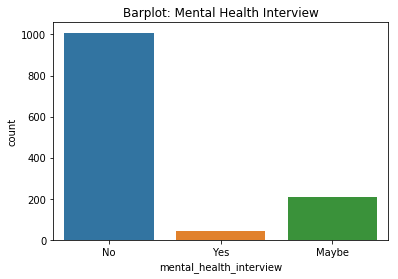

In [51]:
sns.countplot(mh_survey["mental_health_interview"])
plt.title("Barplot: Mental Health Interview")
plt.show()

#### Would you bring up a physical health issue with a potential employer in an interview?

In [52]:
# Physical health interview
mh_survey["phys_health_interview"].value_counts()

Maybe    557
No       500
Yes      202
Name: phys_health_interview, dtype: int64

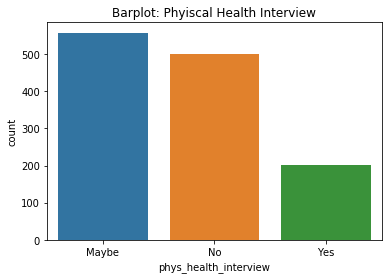

In [53]:
sns.countplot(mh_survey["phys_health_interview"])
plt.title("Barplot: Phyiscal Health Interview")
plt.show()

#### Do you feel that your employer takes mental health as seriously as physical health?

In [54]:
# Mental vs. Physical
mh_survey["mental_vs_physical"].value_counts()

Don't know    576
Yes           343
No            340
Name: mental_vs_physical, dtype: int64

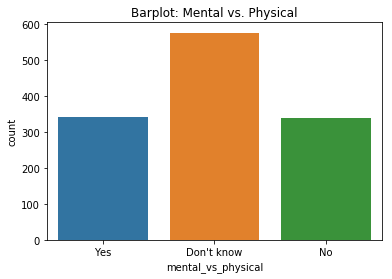

In [55]:
sns.countplot(mh_survey["mental_vs_physical"])
plt.title("Barplot: Mental vs. Physical")
plt.show()

#### Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

In [56]:
# Observed consequences 
mh_survey["obs_consequence"].value_counts()

No     1075
Yes     184
Name: obs_consequence, dtype: int64

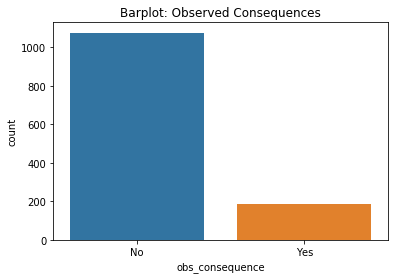

In [57]:
sns.countplot(mh_survey["obs_consequence"])
plt.title("Barplot: Observed Consequences")
plt.show()

## Research proposal
### Problem
The responses to the two following survey questions suggest that there is a stigma attached to mental health problems:   

In [58]:
def yes_maybe_combine(response):
    if (response == "Yes") | (response == "Maybe"):
        return "Yes/Maybe"
    else:
        return response
mh_survey["mental_health_consequence2"] = mh_survey["mental_health_consequence"].apply(lambda x: yes_maybe_combine(x))
mh_survey["phys_health_consequence2"] = mh_survey["phys_health_consequence"].apply(lambda x: yes_maybe_combine(x))

mental_cons_table = mh_survey["mental_health_consequence2"].value_counts(normalize=True)
physical_cons_table = mh_survey["phys_health_consequence2"].value_counts(normalize=True)
print("Do you think that discussing a mental health issue with your employer would have negative consequences?")
print(mental_cons_table)

print("\nDo you think that discussing a physical health issue with your employer would have negative consequences?")
print(physical_cons_table)

Do you think that discussing a mental health issue with your employer would have negative consequences?
Yes/Maybe    0.610802
No           0.389198
Name: mental_health_consequence2, dtype: float64

Do you think that discussing a physical health issue with your employer would have negative consequences?
No           0.73471
Yes/Maybe    0.26529
Name: phys_health_consequence2, dtype: float64


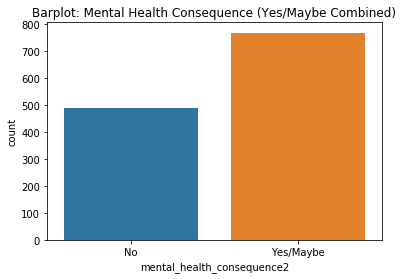

In [59]:
sns.countplot(x=mh_survey["mental_health_consequence2"])
plt.title("Barplot: Mental Health Consequence (Yes/Maybe Combined)")
plt.show()

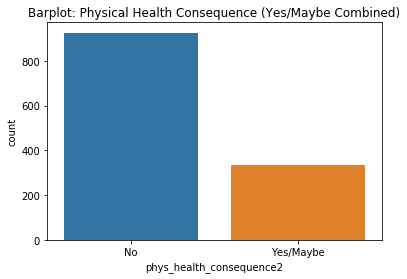

In [60]:
sns.countplot(x=mh_survey["phys_health_consequence2"])
plt.title("Barplot: Physical Health Consequence (Yes/Maybe Combined)")
plt.show()

When asked, “do you think that discussing a __mental health__ issue with your employer would have negative consequences?” 61% of respondents answered “yes” or “maybe”, while only 39% answered “no”. However, when asked the same question with __physical health__ replacing mental health, only 27% of respondents answered “yes” or “maybe”, while 73% answered no.

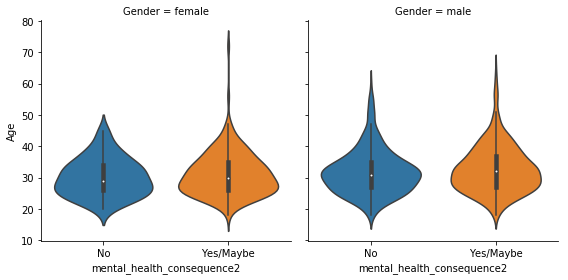

In [61]:
g = sns.factorplot(x="mental_health_consequence2", y="Age", data=mh_survey, kind="violin", col="Gender")
#g.fig.suptitle("Mental Health Consequences by Gender and Accross Age")
plt.show()

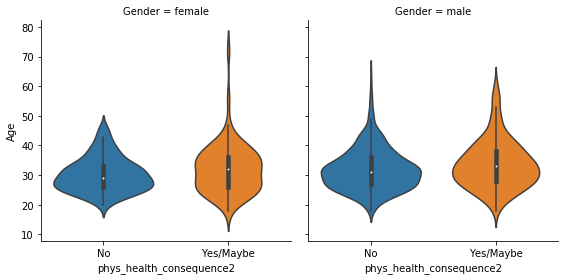

In [62]:
g = sns.factorplot(x="phys_health_consequence2", y="Age", data=mh_survey, kind="violin", col="Gender")
#g.fig.suptitle("Physical Health Consequences by Gender and Accross Age")
plt.show()

The results are consistent across gender and age (although the one age outlier gives the female distribution a heavy right skew). This would indicate a widely perceived stigma attached to mental health issues. This is a problem since this perceived stigma could reduce employee willingness to seek treatment for mental health issues and like physical health issues, if left untreated, mental health issues can reduce an employee’s quality of life and make them less productive.

### Potential solution 

A well designed and executed company based mental health awareness program may reduce the stigma attached to mental health issues. To test this we can take a sample of tech firms, and split them into two groups: Group 1 is the treatment group which implements a mental health awareness program. Group 2 is the control group, which does not implement a mental health awareness program. At the end of the program’s implementation, the employees will be given a survey that asks the same questions regarding mental and physical health consequences.

### Outcome (key metric)

To evaluate success, we use a metric I will call the mental health perception gap. I define this metric as the difference between the frequency of respondents answering “no” to the mental health consequences question, and the frequency of respondents answering “no” to the physical health consequences question. For example, the current gap we observe in the survey is calculated as follows:

In [63]:
mental_no = mental_cons_table[1]
phyiscal_no = physical_cons_table[0]

mental_gap = mental_no - phyiscal_no
print(mental_gap)

-0.34551231135822086


For this metric, a score of 0.0 would indicate parity between attitudes towards mental and physical health. 

### Hypothesis
The hypothesis is that firms implementing the mental health awareness program will see a reduction the mental health perception gap (moving towards zero, or parity). The null hypothesis is that no difference exists between the treatment and control groups. More formally, the null hypothesis is that there is no significant difference between the means of the treatment and control group. We will use the Chi-squared test to test the difference and consider it significant at the 0.05 level.

### Secondary metrics
We will track data on gender, age, location, and firm size (by the number of employees) to examine bias and look for trends among these groups.

### Rollout plan
Given that programs like the one being tested here can be expensive, I gradual rollout would be prudent. Consequently, this plan calls for a month-long rollout at 10%, which would allow time to correct any unanticipated problems or halt the experiment altogether if needed. The 10% rollout would then be followed by month-long rollout at 50%. During both the 10% and 50% phases, we will monitor our key and secondary metrics, looking for sampling bias and other anomalies that may affect the efficacy of the test results. 